In [1]:
import healpy as hp
import matplotlib.pyplot as plt
import numpy as np
import croissant as cro
import faraday as fd
from lunarsky import MoonLocation, LunarTopo
from astropy.coordinates import EarthLocation, AltAz

fatal: No names found, cannot describe anything.


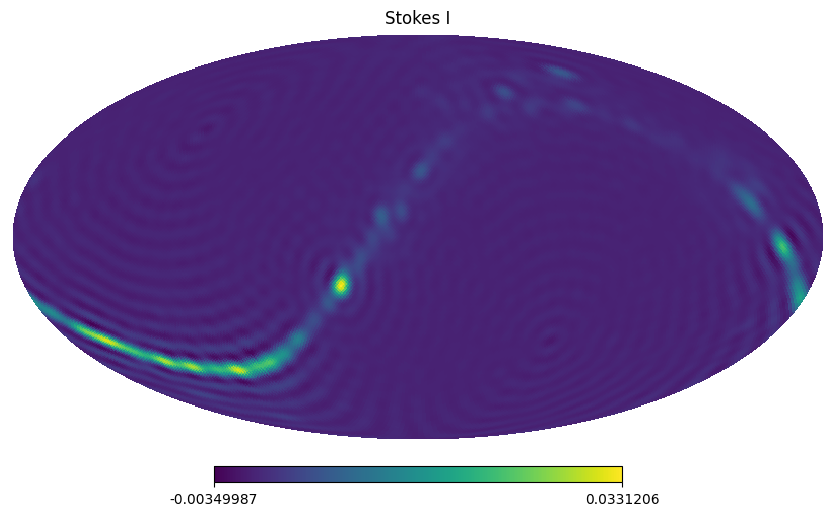

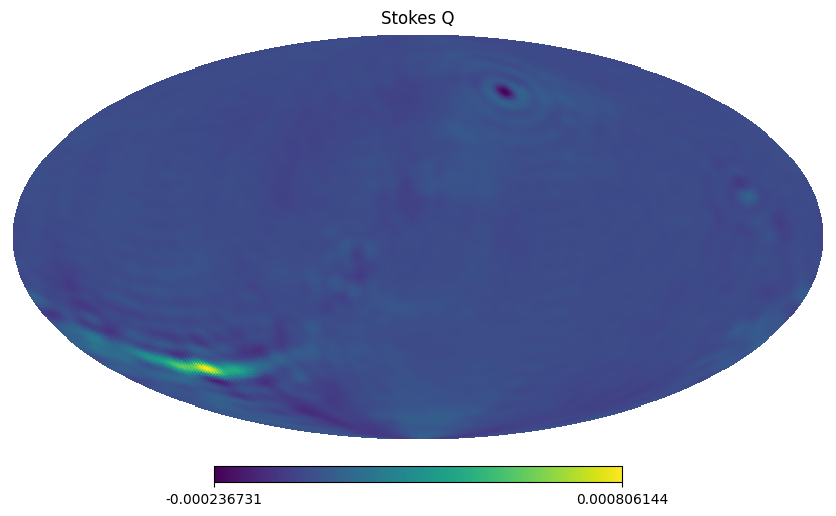

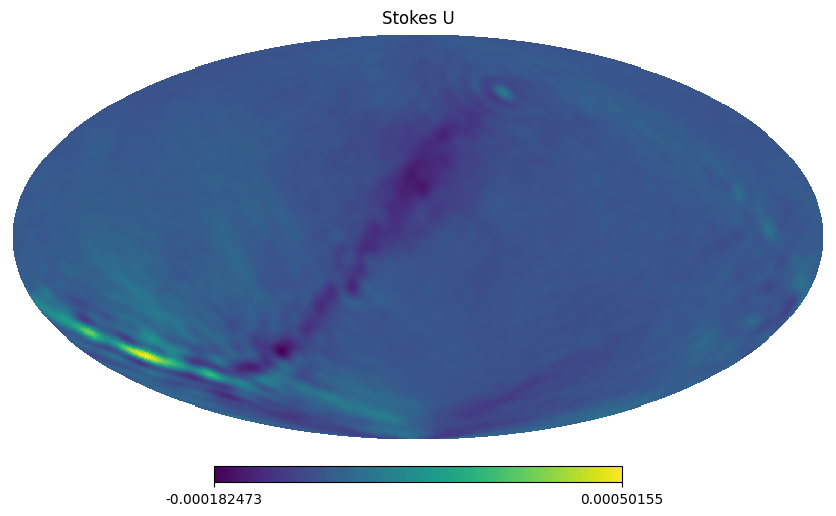

In [2]:
NSIDE = 64

LAT = -23.813
LON = 18.258
TIME = "2024-09-10 09:00:00"

sky = fd.Sky.wmap(nside=NSIDE)
sky.gal_to_topo(LAT, LON, TIME, moon=True, pol=True)

hp.mollview(sky.stokes[0, 0], cbar=True, title="Stokes I")  # I
hp.mollview(sky.stokes[1, 0], cbar=True, title="Stokes Q")  # Q
hp.mollview(sky.stokes[2, 0], cbar=True, title="Stokes U")  # U

In [3]:
# combine stokes and freq axes to one
npix = sky.stokes.shape[-1]
stokes = sky.stokes.reshape(-1, npix)
# galactic to mcmf (equatorial)
r_g2m = cro.Rotator(coord="GM")
stokes_mcmf = r_g2m.rotate_map_alms(stokes, lmax=50, polarized=True)
r_m2t = cro.Rotator(coord="MT", loc=(LON, LAT), time=TIME)
stokes_topo = r_m2t.rotate_map_alms(stokes_mcmf, lmax=50, polarized=True)
sky.stokes = stokes_topo.reshape(sky.stokes.shape)

In [4]:
for time in [f"2024-11-01 1{h}:00:00" for h in range(10)]:
    print(time)
    print(cro.Rotator(coord="MT", loc=(LON, LAT), time=time))

2024-11-01 10:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 11:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 12:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 13:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 14:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 15:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 16:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 17:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 18:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]
2024-11-01 19:00:00
[ [(None, None)], [array([0.31866215, 1.15518109, 3.1415926 ])], [False] ]


In [5]:
from lunarsky import Time

In [17]:
rot=None
coord="MT"
inv=None
deg=True
eulertype='ZYX'
_loc=(LON, LAT)

CM = None

to_frames = []

for time in [f"2024-11-0{h} 10:00:00" for h in range(1, 10)]:
    

    EUL_TYPES = ["ZYX", "X", "Y"]  # types supported by healpy
    # healpy does not warn about this but silently defaults to "ZYX"
    if eulertype not in EUL_TYPES:
        raise ValueError(f"eulertype must be in {EUL_TYPES}")
    # astropy frames (consistent with healpy)
    FRAMES = {
        "G": "galactic",
        "C": "fk5",
        "E": "BarycentricMeanEcliptic",
        "M": "mcmf",
    }

    coord = [c.upper() for c in coord]
    if len(coord) != 2:
        raise ValueError("coord must be a sequence of length 2")
    if "T" in coord:  # topocentric
        if "M" in coord:  # on moon
            loc = MoonLocation(*_loc)
            from_frame = FRAMES["M"]
            to_frame = LunarTopo(location=loc, obstime=Time(time))
        elif "C" in coord:  # on earth
            loc = EarthLocation(*_loc)
            from_frame = FRAMES["C"]
            to_frame = AltAz(location=loc, obstime=time)
    convmat = cro.utils.get_rot_mat(from_frame, to_frame)
    rot = cro.utils.rotmat_to_euler(convmat)
    
    if CM is None:
        CM = convmat
        
    #print(time, to_frame.zen)
    to_frames.append(to_frame)
    
    

In [18]:
from lunarsky import SkyCoord, MCMF

In [19]:
to_frames

[<LunarTopo Frame (obstime=2024-11-01 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-02 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-03 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-04 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-05 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-06 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-07 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-08 10:00:00.000, loc

In [9]:
RM = None

for to_frame in to_frames:
    x, y, z = np.eye(3)  # unit vectors
    sc = SkyCoord(
        x=x, y=y, z=z, frame=MCMF(), representation_type="cartesian"
    )
    rmat = sc.transform_to(to_frame).cartesian.xyz.value

    if RM is None:
        RM = rmat
        
    print((rmat == RM).all())

True
True
True
True
True
True
True
True
True


In [21]:
to_frames

[<LunarTopo Frame (obstime=2024-11-01 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-02 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-03 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-04 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-05 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-06 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-07 10:00:00.000, location=<MoonLocation (1509208.82070534, 497896.08374508, -701359.13432171) m>)>,
 <LunarTopo Frame (obstime=2024-11-08 10:00:00.000, loc

True
True
True
True
True
True
True
True
True


In [11]:
rot=None
coord="CT"
inv=None
deg=True
eulertype='ZYX'
_loc=(LON, LAT)

CM = None

to_frames = []

for time in [f"2024-11-0{h} 10:00:00" for h in range(1, 10)]:
    

    EUL_TYPES = ["ZYX", "X", "Y"]  # types supported by healpy
    # healpy does not warn about this but silently defaults to "ZYX"
    if eulertype not in EUL_TYPES:
        raise ValueError(f"eulertype must be in {EUL_TYPES}")
    # astropy frames (consistent with healpy)
    FRAMES = {
        "G": "galactic",
        "C": "fk5",
        "E": "BarycentricMeanEcliptic",
        "M": "mcmf",
    }

    coord = [c.upper() for c in coord]
    if len(coord) != 2:
        raise ValueError("coord must be a sequence of length 2")
    if "T" in coord:  # topocentric
        if "M" in coord:  # on moon
            loc = MoonLocation(*_loc)
            from_frame = FRAMES["M"]
            to_frame = LunarTopo(location=loc, obstime=Time(time))
        elif "C" in coord:  # on earth
            loc = EarthLocation(*_loc)
            from_frame = FRAMES["C"]
            to_frame = AltAz(location=loc, obstime=time)
    convmat = cro.utils.get_rot_mat(from_frame, to_frame)
    rot = cro.utils.rotmat_to_euler(convmat)
    
    if CM is None:
        CM = convmat
        
    #print(time, to_frame.zen)
    to_frames.append(to_frame)
    
    

RM = None

for to_frame in to_frames:
    x, y, z = np.eye(3)  # unit vectors
    sc = SkyCoord(
        x=x, y=y, z=z, frame="icrs", representation_type="cartesian"
    )
    rmat = sc.transform_to(to_frame).cartesian.xyz.value

    if RM is None:
        RM = rmat
        
    print((rmat == RM).all())

True
False
False
False
False
False
False
False
False


In [13]:
from astropy.coordinates import FK5

In [15]:
x, y,z = np.eye(3)
ff = FK5(x=x, y=y, z=z, representation_type='cartesian')
ff.transform_to(AltAz(obstime=time, location=loc)).cartesian.xyz.value
#galactic = [LunarTopo(alt = alt*u.rad, az = az*u.rad, obstime = time_, 
 #                location = self.loc).transform_to(coord.Galactic()) for time_ in times]

array([[-0.32018875, -0.24296356,  0.9156607 ],
       [ 0.60191375, -0.79856774, -0.0015157 ],
       [-0.7315593 , -0.55068891, -0.40194922]])

In [16]:
rmat

array([[-0.32018874, -0.24296361,  0.91566069],
       [ 0.60191366, -0.79856781, -0.0015158 ],
       [-0.73155938, -0.55068879, -0.40194924]])

In [28]:
from astropy.coordinates import Galactic
import astropy.units as u
times = [f"2024-11-0{h} 10:00:00" for h in range(1, 10)]

def get_l_b_from_alt_az(alt, az, times = None):
    """ 
    Function that calculates a track in (l, b) galactic coordinates given coordinates in lunarcentric (Alt, Az).
    Alt and Az are given following the astronomical convention (angles measured from N towards E).
    Returns (l, b) in *radians*
    :param alt: Altitude
    :type alt: numpy array
    :param az: Azimuth
    :type az: numpy array
    :param times: Times for observation. Defaults to self.times if not specified
    :type times: numpy array
    :returns: (l, b) coordinates of object at self.times 
    :rtype: numpy array   
    """
    galactic = [LunarTopo(alt = alt*u.rad, az = az*u.rad, obstime = time_, 
             location = loc).transform_to(Galactic()) for time_ in times]
    return [g.cartesian.xyz.value for g in galactic]
#     l = np.array([float(x.l/u.rad) for x in galactic])
#     b = np.array([float(x.b/u.rad) for x in galactic])
#     return l,b

get_l_b_from_alt_az(np.pi/2, 0, times=times)

[array([-0.74726526, -0.21189446, -0.62983757]),
 array([-0.82536738, -0.31809983, -0.46645598]),
 array([-0.85738527, -0.42579463, -0.28911837]),
 array([-0.84163528, -0.52930714, -0.10716347]),
 array([-0.77894948, -0.62318682,  0.06982761]),
 array([-0.67263136, -0.70249132,  0.232536  ]),
 array([-0.52828133, -0.76304667,  0.37239577]),
 array([-0.35350137, -0.80166684,  0.48204466]),
 array([-0.15749445, -0.81632125,  0.55571136])]

In [49]:
# new method

for time in times:
    x, y, z = np.eye(3)
    moon_frame = LunarTopo(x=x, y=y, z=z, location=loc, obstime=Time(time), representation_type='cartesian')
    rmat = moon_frame.transform_to(MCMF()).cartesian.xyz.value

    print(rmat[:, -1])

[ 0.86880942  0.28662488 -0.40375287]
[ 0.86880942  0.28662488 -0.40375287]
[ 0.86880942  0.28662488 -0.40375287]
[ 0.86880942  0.28662488 -0.40375287]
[ 0.86880942  0.28662488 -0.40375287]
[ 0.86880942  0.28662488 -0.40375287]
[ 0.86880942  0.28662488 -0.40375287]
[ 0.86880942  0.28662488 -0.40375287]
[ 0.86880942  0.28662488 -0.40375287]


In [50]:
[cro.utils.get_rot_mat(Galactic(), to_frame) for to_frame in to_frames]

[array([[-0.46466844,  0.84417724,  0.26729765],
        [-0.47505565, -0.49240789,  0.729285  ],
        [-0.74726526, -0.21189446, -0.62983757]]),
 array([[-0.49911369,  0.79728461,  0.3394448 ],
        [-0.26392084, -0.51298124,  0.81682069],
        [-0.82536738, -0.31809983, -0.46645598]]),
 array([[-0.51320393,  0.7497379 ,  0.4177497 ],
        [-0.03888742, -0.50654912,  0.86133371],
        [-0.85738527, -0.42579463, -0.28911837]]),
 array([[-0.506195  ,  0.70404277,  0.49808675],
        [ 0.18819321, -0.47345299,  0.86047986],
        [-0.84163528, -0.52930714, -0.10716347]]),
 array([[-0.47845471,  0.66260754,  0.57622247],
        [ 0.40536255, -0.41543885,  0.81430447],
        [-0.77894948, -0.62318682,  0.06982761]]),
 array([[-0.43144373,  0.62761619,  0.64803875],
        [ 0.60118496, -0.33556499,  0.72523981],
        [-0.67263136, -0.70249132,  0.232536  ]]),
 array([[-0.3676388 ,  0.60091301,  0.70975015],
        [ 0.76534995, -0.23804062,  0.59797669],
        